# EDA

    An exploratory data analysis is made in order to help both prepare the data in the ETL section and later in the recomendations models


First of all is checked for nulls and duplicates in all three data sets

In [16]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
import seaborn as sns 

#### Reviews:

In [17]:
reviews = pd.read_csv("databases/australian_user_reviews_fixed_v2.csv")

In [18]:
reviews.head(1)

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id
0,NaN,"Posted November 5, 2011.",NaN,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479


In [19]:
reviews.isnull().sum()

funny          51147
posted             0
last_edited    53158
item_id            0
helpful            0
recommend          0
review            31
user_id            0
dtype: int64

In [20]:
reviews.duplicated().sum()

874

In [21]:
reviews.isna().sum()

funny          51147
posted             0
last_edited    53158
item_id            0
helpful            0
recommend          0
review            31
user_id            0
dtype: int64

In [42]:
for i in reviews.columns: print(i, ": ", reviews[i].dtype)

funny :  object
posted :  object
last_edited :  object
item_id :  int64
helpful :  object
recommend :  bool
review :  object
user_id :  object


#### Items

In [23]:
items_users = pd.read_csv("databases/australian_users_items_fixed_v2.csv")

In [24]:
items_users.duplicated().sum()

46645

In [25]:
items_users.isna().sum()

item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
user_id             0
steam_id            0
dtype: int64

In [ ]:
for i in items_users.columns: print(i, ": ", items_users[i].dtype)

#### Games

In [27]:
games = pd.read_csv("databases/output_steam_games_fixed.csv", low_memory=False)

In [28]:
games.duplicated().sum()

0

In [29]:
games.isna().sum()

#Checking for empty values, being that basically every column is usefull for our pourpouse here, 
#every NA is enough reason to drop a row

Unnamed: 0          0
publisher       96381
genres          91593
app_name        88312
title           90360
url             88310
release_date    90377
tags            88473
reviews_url     88312
specs           88980
price           89687
early_access    88310
id              88312
developer       91609
dtype: int64

In [48]:
for i in games.columns: print(i, ": ", games[i].dtype)

Unnamed: 0 :  int64
publisher :  object
genres :  object
app_name :  object
title :  object
url :  object
release_date :  object
tags :  object
reviews_url :  object
specs :  object
price :  object
early_access :  float64
id :  float64
developer :  object


### Analisis grafico    

In [31]:
#Words cloud to take a look to the reviews:

reviews_text = [str(w) for w in reviews["review"].values]

In [32]:
reviews_text=" ".join(reviews_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ignac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


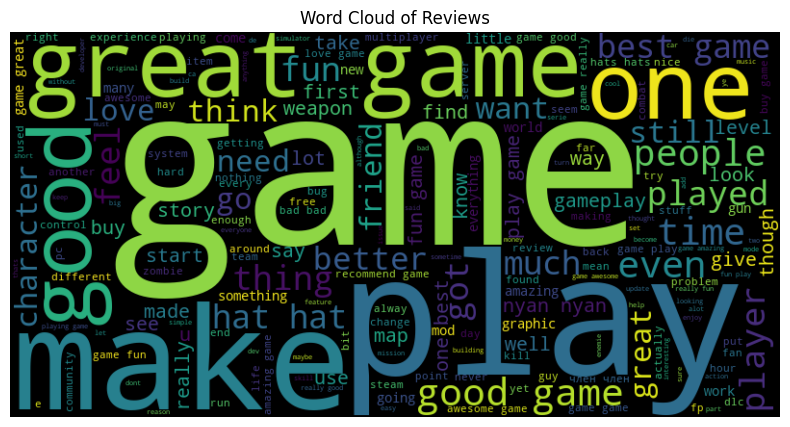

In [33]:
nltk.download('stopwords')

def preprocess_text(text:str):
    
    stopwords = nltk.corpus.stopwords.words('english')
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stopwords]
    return ' '.join(tokens)

all_reviews = preprocess_text(reviews_text)
wordcloud = WordCloud(width=800, height=400).generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

(24752, 33)


<Axes: >

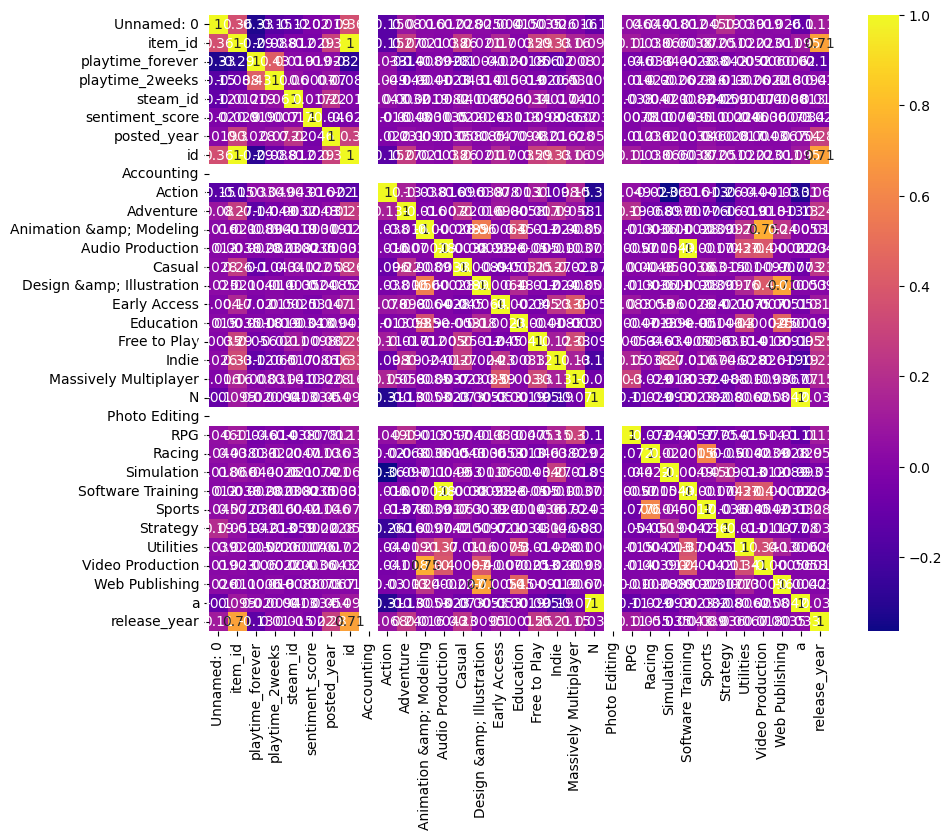

In [49]:
df = pd.read_csv('databases/all_data.csv')

for i in df.columns:
    if df[i].dtype == "float64" or df[i].dtype == "int64" :
        pass
    else:
        df.drop(columns=[i], inplace=True)

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='plasma')
